Follow up to Sleep_Position_Investigation with 5x more data

<b>Data from:</b> SomnoPose 2.0 app. 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="ticks")
sns.set_context(context="talk")

In [2]:
df = pd.read_csv("../data/sleep_position/SomnoPose-Data-2020-03-31-204112_April11.csv")
df["Date"] = df["Date"].fillna(method="ffill")
df.head()

,Timestamp,Orientation,Inclination,Time_of_day,Date
0,6.074053e+08,-149.16,22.96,20:41:12,NaN
1,6.074053e+08,-149.17,21.61,20:41:14,NaN
2,6.074053e+08,-150.45,21.12,20:41:16,NaN
3,6.074053e+08,-150.60,21.66,20:41:18,NaN
4,6.074053e+08,-150.34,21.24,20:41:20,NaN


In [3]:
print("Num rows: {}, Num rows no null date: {}".format(df.shape[0], df[~df["Date"].isnull()].shape[0]))

# Drop the null dates now
df = df.dropna()
print("Num after dropping nulls: {}".format(df.shape[0]))
df.head()

df["date_and_time"] = pd.to_datetime(df["Time_of_day"] + " " + df["Date"])
df.index = df["date_and_time"]
df = df.sort_index()
df.head()

Num rows: 154530, Num rows no null date: 154506
Num after dropping nulls: 154506


,Timestamp,Orientation,Inclination,Time_of_day,Date,date_and_time
date_and_time,,,,,,
2020-03-31 20:42:00,607405320.1,-14.82,81.41,20:42:00,2020-03-31,2020-03-31 20:42:00
2020-03-31 20:42:02,607405322.1,-14.73,81.73,20:42:02,2020-03-31,2020-03-31 20:42:02
2020-03-31 20:42:04,607405324.1,-14.61,81.06,20:42:04,2020-03-31,2020-03-31 20:42:04
2020-03-31 20:42:06,607405326.1,-14.87,82.20,20:42:06,2020-03-31,2020-03-31 20:42:06
2020-03-31 20:42:08,607405328.1,-14.85,82.20,20:42:08,2020-03-31,2020-03-31 20:42:08


In [4]:
# Create new column with labels by sleep night
df["sleep_night"] = None
dates = df["Date"].unique()
ncols = 4
nrows = 3

for i in range(0, len(dates)-1):
    start = pd.to_datetime("{} 17:00:00".format(dates[i]))
    if i < len(dates)-2:
        end = pd.to_datetime("{} 16:00:00".format(dates[i+1]))
        df.loc[start:end, "sleep_night"] = dates[i]
    else:
        df.loc[df.index > start, "sleep_night"] = dates[i]
df.head()

,Timestamp,Orientation,Inclination,Time_of_day,Date,date_and_time,sleep_night
date_and_time,,,,,,,
2020-03-31 20:42:00,607405320.1,-14.82,81.41,20:42:00,2020-03-31,2020-03-31 20:42:00,2020-03-31
2020-03-31 20:42:02,607405322.1,-14.73,81.73,20:42:02,2020-03-31,2020-03-31 20:42:02,2020-03-31
2020-03-31 20:42:04,607405324.1,-14.61,81.06,20:42:04,2020-03-31,2020-03-31 20:42:04,2020-03-31
2020-03-31 20:42:06,607405326.1,-14.87,82.20,20:42:06,2020-03-31,2020-03-31 20:42:06,2020-03-31
2020-03-31 20:42:08,607405328.1,-14.85,82.20,20:42:08,2020-03-31,2020-03-31 20:42:08,2020-03-31


[[0, 0], [0, 1], [0, 2], [0, 3], [1, 0], [1, 1], [1, 2], [1, 3], [2, 0], [2, 1], [2, 2], [2, 3]]
['2020-03-31' '2020-04-01' '2020-04-02' '2020-04-03' '2020-04-04'
 '2020-04-05' '2020-04-06' '2020-04-07' '2020-04-08' '2020-04-09'
 '2020-04-10' '2020-04-11']


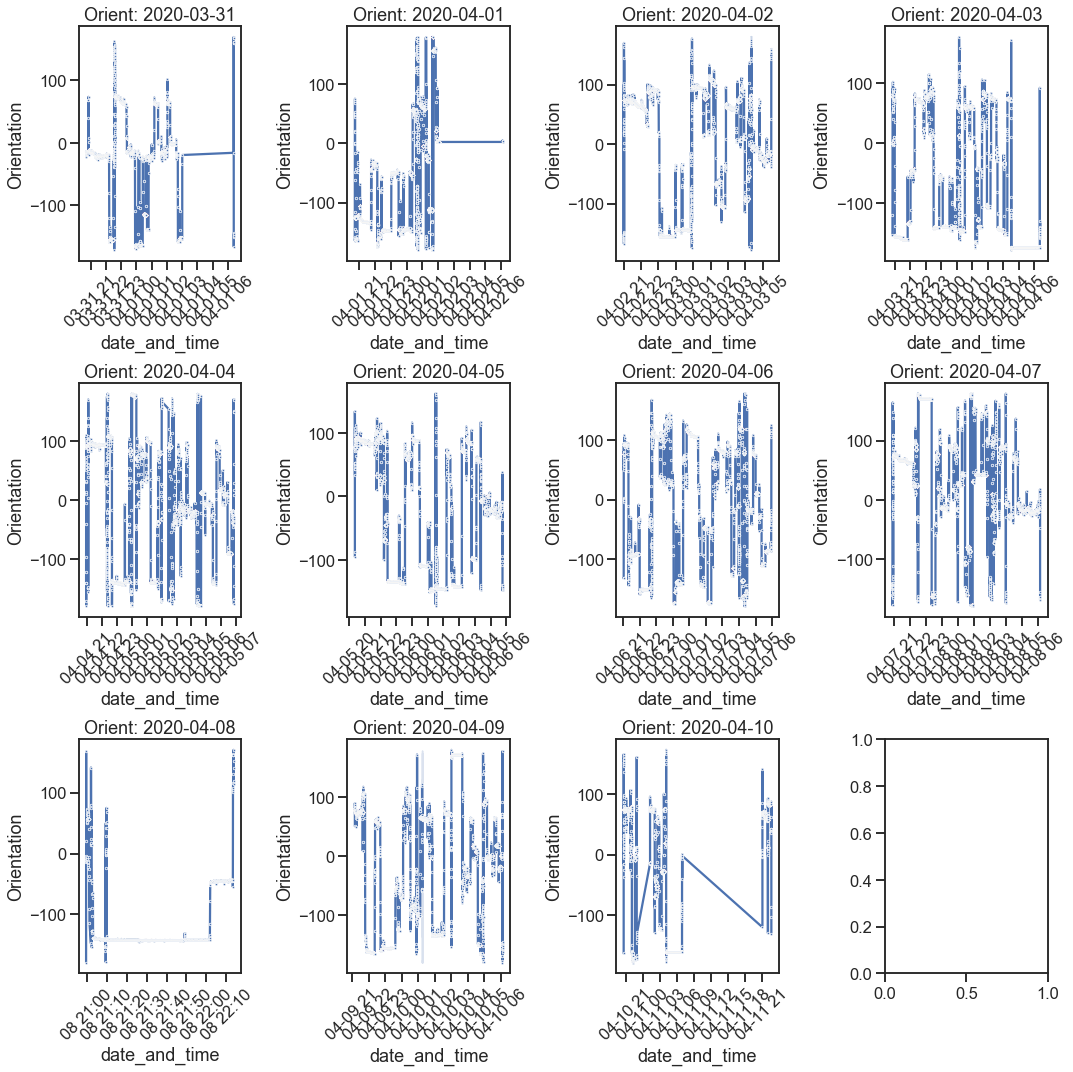

In [ ]:
dates = df["Date"].unique()
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15))

pairs = []
for i in range(0, nrows):
    for j in range(0, ncols):
        pairs.append([i, j])
print(pairs)
print(dates)
for i in range(0, len(dates)-1):
    ax_i = ax[pairs[i][0]][pairs[i][1]]
    df_date = df[df["sleep_night"] == dates[i]]
    sns.lineplot(x=df_date.index, y=df_date["Orientation"], ax=ax_i,
                 markers=True, marker=".", markersize=5)
    ax_i.set_title("Orient: {}".format(dates[i]))
    ax_i.tick_params(axis="x", labelrotation=45)
fig.tight_layout() 

['2020-03-31' '2020-04-01' '2020-04-02' '2020-04-03' '2020-04-04'
 '2020-04-05' '2020-04-06' '2020-04-07' '2020-04-08' '2020-04-09'
 '2020-04-10' '2020-04-11']


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  if sys.path[0] == '':


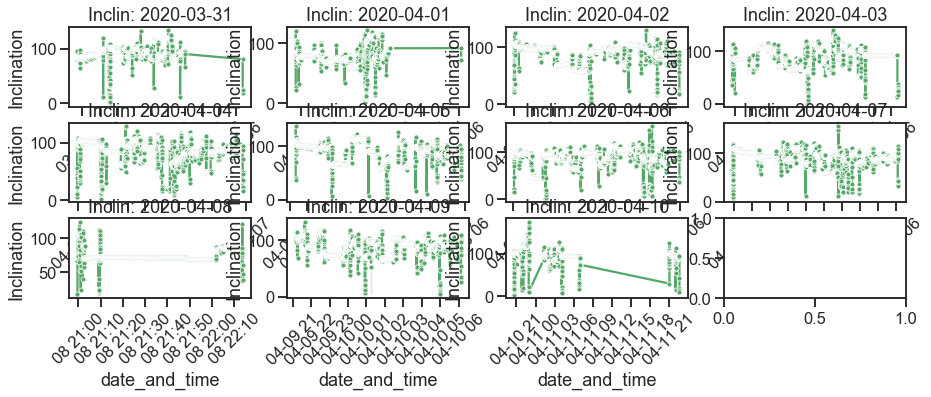

In [ ]:
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5))

dates = df["Date"].unique()
print(dates)
for i in range(0, len(dates)-1):
    ax_i = ax[pairs[i][0]][pairs[i][1]]
    df_date = df[df["sleep_night"] == dates[i]]
    sns.lineplot(x=df_date.index, y=df_date["Inclination"], ax=ax_i,
                 markers=True, marker="o", markersize=5, color="g")
    ax_i.set_title("Inclin: {}".format(dates[i]))
    ax_i.tick_params(axis="x", labelrotation=45)
fig.tight_layout() 

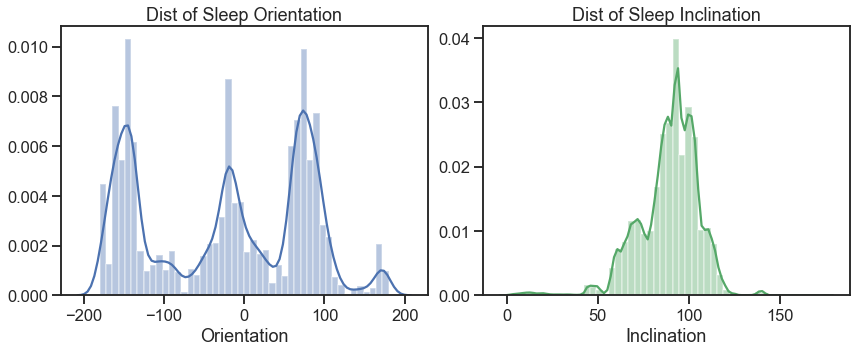

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.distplot(df["Orientation"].dropna(), ax=ax[0])
sns.distplot(df["Inclination"].dropna(), ax=ax[1], color="g")
ax[0].set_title("Dist of Sleep Orientation")
ax[1].set_title("Dist of Sleep Inclination")
fig.tight_layout()

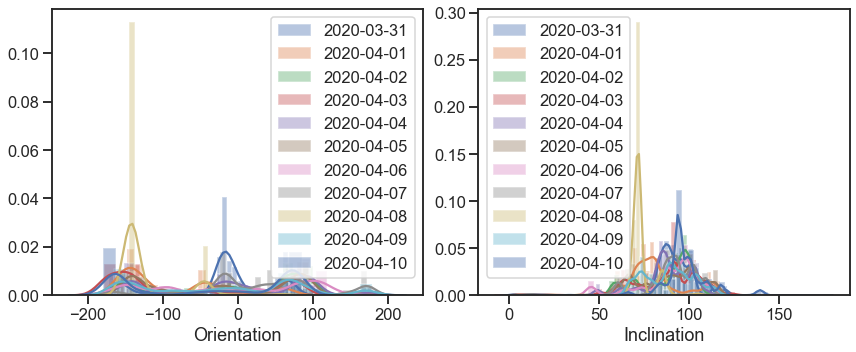

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

for i in range(0, len(dates)-1):
    df_date = df[df["sleep_night"] == dates[i]]
    sns.distplot(df_date["Orientation"], ax=ax[0], label="{}".format(dates[i]))
    sns.distplot(df_date["Inclination"], ax=ax[1], label="{}".format(dates[i]))
ax[0].legend()
ax[1].legend()
fig.tight_layout()

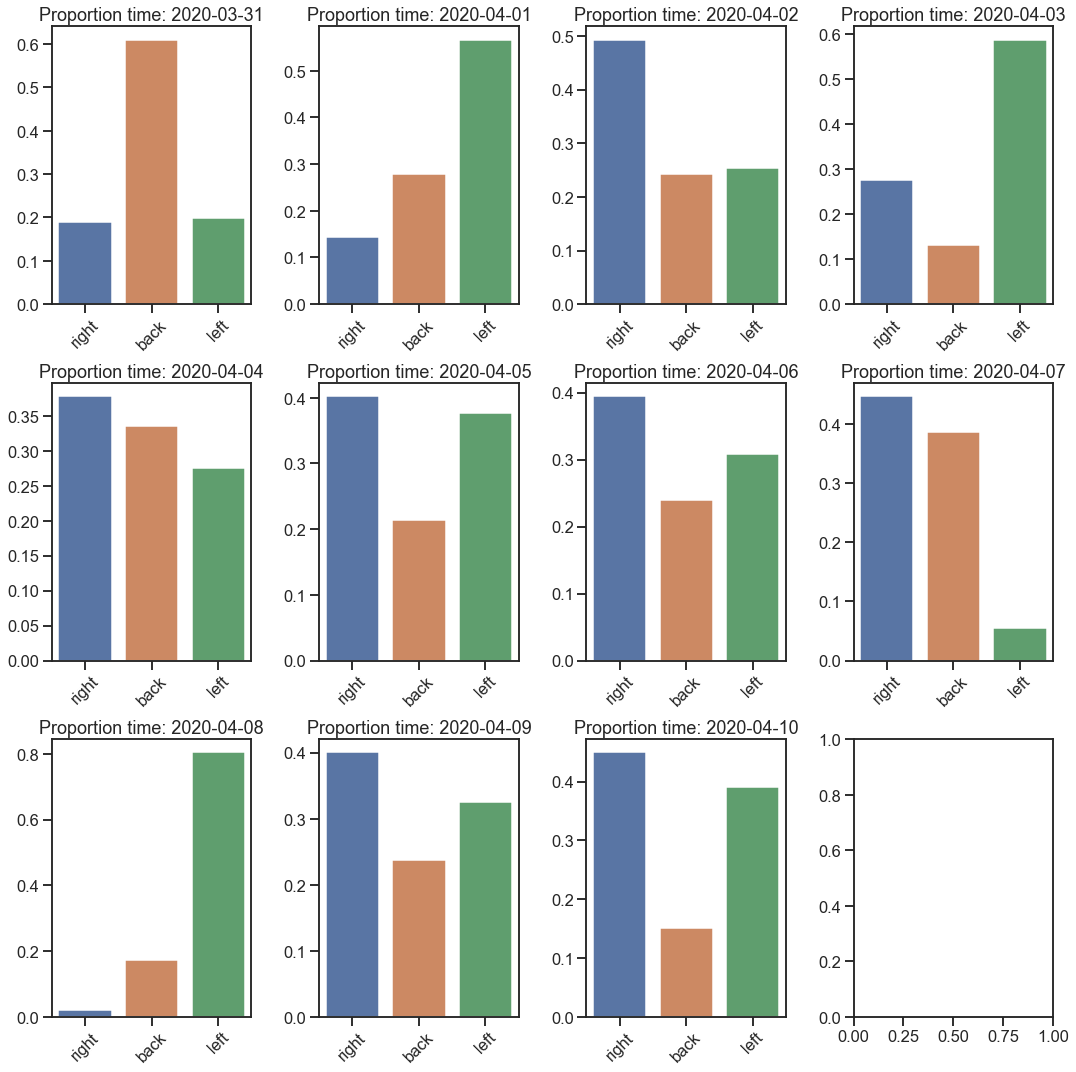

In [ ]:
# How much time is spent in each of those orientations each night?
# Assumption: Each row represents the same amount of time
# Result: There is not a specific trend over the three nights

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15))

for i in range(0, len(dates)-1):
    ax_i = ax[pairs[i][0]][pairs[i][1]]
    df_date = df[df["sleep_night"] == dates[i]]

    nrows = df_date.shape[0]
    right = df_date[df_date["Orientation"] > 50].shape[0] / float(nrows)
    back = df_date[(df_date["Orientation"] > -80) & (df_date["Orientation"] < 30)].shape[0] / float(nrows)
    left = df_date[(df_date["Orientation"] > -200) & (df_date["Orientation"] < -90)].shape[0] / float(nrows)
    sns.barplot(x=["right", "back", "left"], y=[right, back, left], ax=ax_i)
    ax_i.set_title("Proportion time: {}".format(dates[i]))
    ax_i.tick_params(axis="x", labelrotation=45)
fig.tight_layout()

In [ ]:
df["position"] = None
df.loc[df[df["Orientation"] > 50].index, "position"] = 0
df.loc[df[(df["Orientation"] > -80) & (df["Orientation"] < 30)].index, "position"] = 1
df.loc[df[(df["Orientation"] > -200) & (df["Orientation"] < -90)].index, "position"] = 2
df["position"] = df["position"].astype(float)

In [ ]:
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15))

for i in range(0, len(dates)-1):
    ax_i = ax[pairs[i][0]][pairs[i][1]]
    df_date = df[df["sleep_night"] == dates[i]].dropna()
    sns.lineplot(x=df_date.index, y=df_date["position"], ax=ax_i,
                 markers=True, marker=".", markersize=5)
    ax_i.set_title("Positions: {}".format(dates[i]))
    ax_i.tick_params(axis="x", labelrotation=45)
fig.tight_layout() 